<a href="https://colab.research.google.com/github/prof-eduardo-nunes/unicamp-mineracao_dados/blob/main/voos_comentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{('GRU', 'GYN'): [('6:19', '8:13', 239), ('8:04', '10:59', 136), ('9:31', '11:43', 210), ('11:07', '13:24', 171), ('12:31', '14:02', 234), ('14:05', '15:47', 226), ('15:07', '17:21', 129), ('16:35', '18:56', 144), ('18:25', '20:34', 205), ('20:05', '21:44', 172)], ('GYN', 'GRU'): [('6:11', '8:31', 249), ('7:39', '10:24', 219), ('9:15', '12:03', 99), ('11:08', '13:07', 175), ('12:18', '14:56', 172), ('13:37', '15:08', 250), ('15:03', '16:42', 135), ('16:51', '19:09', 147), ('18:12', '20:17', 242), ('20:05', '22:06', 261)], ('GRU', 'CNF'): [('6:03', '8:43', 219), ('7:50', '10:08', 164), ('9:11', '10:42', 172), ('10:33', '13:11', 132), ('12:08', '14:47', 231), ('14:19', '17:09', 190), ('15:04', '17:23', 189), ('17:06', '20:00', 95), ('18:33', '20:22', 143), ('19:32', '21:25', 160)], ('CNF', 'GRU'): [('6:05', '8:32', 174), ('8:25', '10:34', 157), ('9:42', '11:32', 169), ('11:01', '12:39', 260), ('12:44', '14:17', 134), ('14:22', '16:32', 126), ('15:58', '18:40', 173), ('16:43', '19:00', 24

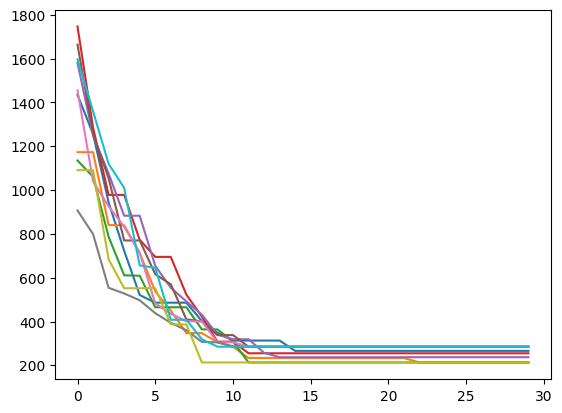

In [ ]:
# Mineração de Dados
# FEAGRI-UNICAMP
# prof Eduardo Nunes
# adaptado de código original de Jones Granatyr

import time
import random
import math



#Essas bibliotecas são usadas para manipulação de tempo,
#geração de números aleatórios e funções matemáticas.

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
#------------------------------------------------------------------------------


pessoas = [('Amanda', 'CWB'),
           ('Pedro', 'GIG'),
           ('Marcos', 'POA'),
           ('Priscila', 'FLN'),
           ('Jessica', 'CNF'),
           ('Paulo', 'GYN')]

destino = 'GRU'

agenda = [1,4, 3,2, 0,3, 6,3, 2,4, 5,3]
#agenda = [4,3, 3,3, 4,3, 3,3, 4,3, 4,3]

dominio = [(0,9)] * (len(pessoas) * 2)

# pessoas: lista de tuplas com nomes e códigos de origem.
# destino: destino comum para todos.
# agenda: lista que representa a agenda inicial de voos.
# dominio: intervalo de índices possíveis para os voos disponíveis.
#-------------------------------------------------------------------------------

voos = {}

for linha in open('voos.txt'):

    _origem, _destino, _saida, _chegada, _preco = linha.split(',')
    voos.setdefault((_origem, _destino), [])
    voos[(_origem, _destino)].append((_saida, _chegada, int(_preco)))

print (voos)

#  Aqui, o código lê um arquivo chamado voos.txt, onde cada linha contém
#  informações sobre voos (origem, destino, horários e preços).
#  Os dados são armazenados em um dicionário voos, onde a chave é
#  uma tupla (origem, destino) e o valor é uma lista de voos disponíveis.
#--------------------------------------------------------------------------------------------------

def imprimir_agenda(agenda):
    id_voo = -1
    for i in range(len(agenda) // 2):
        nome = pessoas[i][0]
        origem = pessoas[i][1]
        id_voo += 1
        ida = voos[(origem, destino)][agenda[id_voo]]
        id_voo += 1
        volta = voos[(destino, origem)][agenda[id_voo]]
        print('%10s%10s %5s-%5s R$%3s %5s-%5s R$%3s' % (nome, origem, ida[0], ida[1], ida[2],
                                                       volta[0], volta[1], volta[2]))



# Essa função imprime a agenda de voos formatada. Para cada pessoa,
#  ela obtém os voos de ida e volta da lista voos usando os índices da agenda.
#-------------------------------------------------------------------------------------------------


def get_minutos(hora):
    x = time.strptime(hora, '%H:%M')
    minutos = x[3] * 60 + x[4]
    return minutos

# Converte uma string de hora no formato 'HH:MM' para um número total de minutos.
# ---------------------------------------------------------------------------------------------------

def funcao_custo(solucao):

  # Essa função é responsável por calcular o custo total de uma determinada solução,
  # que é representada pela agenda de voos. O custo aqui é medido em termos de tempo
  #  de espera entre os voos.


    preco_total = 0
    ultima_chegada = 0
    primeira_partida = 1439 # 23 horas e 59 min em minutos é 23*60 + 59 = 1439

#   preco_total: variável que, no código comentado, deveria armazenar o
#   custo total em termos de preço (atualmente não está sendo usada).
# ultima_chegada: rastreia a última hora de chegada dos voos de ida,
# inicializada com zero.
# primeira_partida: rastreia a primeira hora de partida dos voos de volta,
#  inicializada com 1439 (o máximo possível em minutos em um dia).

    id_voo = -1
    for i in range(len(solucao) // 2): # // 2, pega a parte inteira da divisão por 2
        origem = pessoas[i][1]
        id_voo += 1
        ida = voos[(origem, destino)][solucao[id_voo]]
        id_voo += 1
        volta = voos[(destino, origem)][solucao[id_voo]]


        if ultima_chegada < get_minutos(ida[1]):
            ultima_chegada = get_minutos(ida[1])

        if primeira_partida > get_minutos(volta[0]):
            primeira_partida = get_minutos(volta[0])

# O loop acima itera sobre a metade da solucao (-->agenda a ser avaliada), pois cada pessoa tem um voo de ida e um de volta.
# id_voo é usado para rastrear o índice do voo atual na agenda.
# ida e volta obtêm os horários e preços dos voos de ida e volta, respectivamente.
# O código atualiza ultima_chegada com a maior hora de chegada dos voos de ida.
# Da mesma forma, atualiza primeira_partida com a menor hora de partida dos voos de volta

    total_espera = 0
    id_voo = -1
    for i in range(len(solucao) // 2):
        origem = pessoas[i][1]
        id_voo += 1
        ida = voos[(origem, destino)][solucao[id_voo]]
        id_voo += 1
        volta = voos[(destino, origem)][solucao[id_voo]]

        total_espera += ultima_chegada - get_minutos(ida[1])# soma o tempo de espera para o inicio da reunião
        total_espera += get_minutos(volta[0]) - primeira_partida # soma o tempo de espera para embarque após o final da reunião

#  Nesse segundo loop, a função calcula o tempo total de espera entre os voos.
# total_espera acumula o tempo de espera:
# A espera antes do início da reunião é calculada subtraindo a hora de chegada do voo de ida (get_minutos(ida[1])) da ultima_chegada.
# A espera após o final da reunião é calculada subtraindo a hora de partida do voo de volta (get_minutos(volta[0])) da primeira_partida.



    return total_espera

 #A função retorna o total de tempo de espera, que é usado como uma medida de custo na otimização da agenda de voos

# A função funcao_custo é crucial para o funcionamento do algoritmo genético, pois fornece uma métrica para avaliar
# quão boa é uma determinada solução (agenda de voos). Ela considera tanto as chegadas e partidas
# quanto o tempo de espera, permitindo que o algoritmo encontre uma combinação ideal que minimize o
# tempo de espera total
#-------------------------fim funcao custo-----------------------------------------------------------------------------




def mutacao(dominio, passo, solucao):
    i = random.randint(0, len(dominio) - 1)
    mutante = solucao

    if random.random() < 0.5:
        if solucao[i] != dominio[i][0]:
            mutante = solucao[0:i] + [solucao[i] - passo] + solucao[i + 1:]
    else:
        if solucao[i] != dominio[i][1]:
            mutante = solucao[0:i] + [solucao[i] + passo] + solucao[i + 1:]

    return mutante





def cruzamento(dominio, solucao1, solucao2):
    i = random.randint(1, len(dominio) - 2) # aleatorio entre o segundo e penultimo cromossomo
    return solucao1[0:i] + solucao2[i:]






def genetico(dominio, funcao_custo, tamanho_populacao = 1000, passo = 1,
             probabilidade_mutacao = 0.2, elitismo = 0.2, numero_geracoes = 30):
    solucoes_estudadas = []
# Essa função é responsável por gerar uma população de soluções, avaliá-las, e aplicar
#  operações de seleção, mutação e cruzamento para evoluir as soluções ao longo de várias gerações.
# dominio: define os limites para os voos disponíveis (min e max).
# funcao_custo: a função que calcula o custo de uma solução.
# tamanho_populacao: número de soluções na população (default é 100).
# passo: usado na mutação para determinar quanto um índice de voo pode ser alterado.
# probabilidade_mutacao: probabilidade de uma mutação ocorrer em uma nova solução (default é 10%).
# elitismo: porcentagem de soluções melhores que serão mantidas para a próxima geração (default é 10%).
# numero_geracoes: quantas vezes a população será evoluída (default é 100)

    populacao = []
    for i in range(tamanho_populacao):
        solucao = [random.randint(dominio[i][0], dominio[i][1]) for i in range(len(dominio))]
        populacao.append(solucao)

# Cria uma lista chamada populacao.
# Para cada solução, gera um vetor aleatório de índices de voos dentro dos limites definidos por dominio.
# Cada solução gerada é adicionada à população.

    numero_elitismo = int(elitismo * tamanho_populacao)

#Calcula quantas das melhores soluções serão mantidas na próxima geração com base na taxa de elitismo.


    for i in range(numero_geracoes): #Inicia um loop que itera pelo número de gerações especificado.

        custos = [(funcao_custo(individuo), individuo) for individuo in populacao]
        custos.sort()
        individuos_ordenados = [individuo for (custo, individuo) in custos]# ordenando a população de acordo com seu custo

# Avalia o custo de cada solução na população chamando funcao_custo.
# As soluções são ordenadas com base no custo (menor custo primeiro).



        populacao = individuos_ordenados[0:numero_elitismo] # seleção dos individuos mais aptos
  # A nova população é inicializada com as melhores soluções da geração anterior,
  # com base na quantidade definida pelo elitismo.


        while len(populacao) < tamanho_populacao:
        # Enquanto a população não atingir o tamanho desejado, novas soluções são geradas.
            if random.random() < probabilidade_mutacao:
                m = random.randint(0, numero_elitismo)
                populacao.append(mutacao(dominio, passo, individuos_ordenados[m]))
                # faz a mutação no individuo 'M'
            else:
                c1 = random.randint(0, numero_elitismo)
                c2 = random.randint(0, numero_elitismo)
                populacao.append(cruzamento(dominio, individuos_ordenados[c1], individuos_ordenados[c2]))
                # cruzamento

# Para cada nova solução a ser gerada, decide aleatoriamente se ela será uma mutação ou um cruzamento:
# Mutação: se o número gerado for menor que a probabilidade de mutação, uma solução é escolhida aleatoriamente
#entre as melhores e uma mutação é aplicada.
# Cruzamento: se não for mutação, dois indivíduos são escolhidos aleatoriamente entre os melhores,
# e um novo indivíduo é criado a partir do cruzamento.

        solucoes_estudadas.append(funcao_custo(custos[0][1]))
        # salva os melhores de todas as gerações

    return custos[0][1], solucoes_estudadas
    # Após todas as gerações, a função retorna a melhor e os melhores de todas as gerações
    # solução encontrada na última avaliação (a que tem o menor custo).

#  A função genetico é a implementação principal do algoritmo genético. Ela cria uma população inicial de soluções,
#  avalia seu custo ao longo de várias gerações e aplica operações de seleção, mutação e cruzamento para evoluir
#  as soluções, visando minimizar o tempo de espera total entre voos. Esse processo se baseia em princípios da
#  evolução natural,como seleção natural e variação, para encontrar soluções eficazes para o problema proposto

#solucao_genetico, solucoes_estudadas = genetico(dominio, funcao_custo)
# custo_genetico = funcao_custo(solucao_genetico)
# print('imprimindo agenda otimizada...')
# imprimir_agenda(solucao_genetico)
# #print('...com custo inicial total de:')
# #print(funcao_custo(agenda))
# print('...com custo total de:')
# print(funcao_custo(solucao_genetico))
# print('solucao:')
# print(solucao_genetico)
#plt.yscale("log")
for i in range (10):
  solucao_genetico[i], solucoes_estudadas[i] = genetico(dominio, funcao_custo)
  plt.plot(solucoes_estudadas[i])
plt.show()